
# Project: Investigate a TMDb Movies Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
In this project, I will be analyzing TMDb movie data.This data set contains about 10000 movie collected from The Movie Database (TMDb),including user ratings and  revenue.
At the end,I will be finding the answers of  following questions-

1. Top rated movies, most popular movie,top directors? 
2. Which genres are most popular from year to year? 
3. What kind of movie genres are made the most?
4. Number of movies released over the years?
5. What kinds of properties are associated with movies that have high revenues?
6. What is the all time highest  profit earned movie?
7. What is the all time highest budget movie?
8. What month is considered "best" for releasing a films/shows?
9. What is the relationship between runtime & ratings, runtime & popularity ?



Breif Description of column of dataset-

 1. id- unique id of each row
 2. imdb_id-system generated id
 3. popularity-popularity score
 4. budget-budget of movie 
 5. revenue-revenue of movie
 6. original_title-title of movie
 7. cast- name of actors
 8. homepage-website link of movie
 9. director-name of directors 
 10. tagline-tagline of movie
 11. keywords- brief description of movie
 12. overview -rating of movie
 13. runtime-duration of movie
 14. genres-category of movie
 15. production_companies-name of production company
 16. release_date-date of release of movie
 17. vote_count-count of voting
 18. vote_average-average of counting movie
 19. release_year-year of releasing of movie
 20. budget_adj-budget of 2010 dollars,accounting for inflation
 21. revenue_adj-revenue of 2010 dollars , accounting for inflation
 
### Tools used in this project-Python,Pandas,Numpy,Matplotlib

In [22]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



## Data Wrangling



### General Properties

In [23]:
# Loading data and displaying top 5 rows
df=pd.read_csv('tmdb-movies.csv')
df.head(5)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [24]:
df.shape

(10866, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [26]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [27]:
# checking null value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## After seeing general properties of data we conclude that 

1.dataset consist of 10866 rows and 21 columns.
2.The dataset contains lot of movies where revenue,budget ,revenue_adj,budget_adj columns have a 0 value.
3.Also cast, genres, keywords, production_companies are separated by '|' character

In [28]:
# Missing values is not identified as NaN, we will replace 0 with NaN in each column
column_name=[  'budget', 'revenue', 'budget_adj', 'revenue_adj']
       
for x in column_name:
    df[x].replace(0,np.nan,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj             

In [30]:
df.duplicated().sum()

1

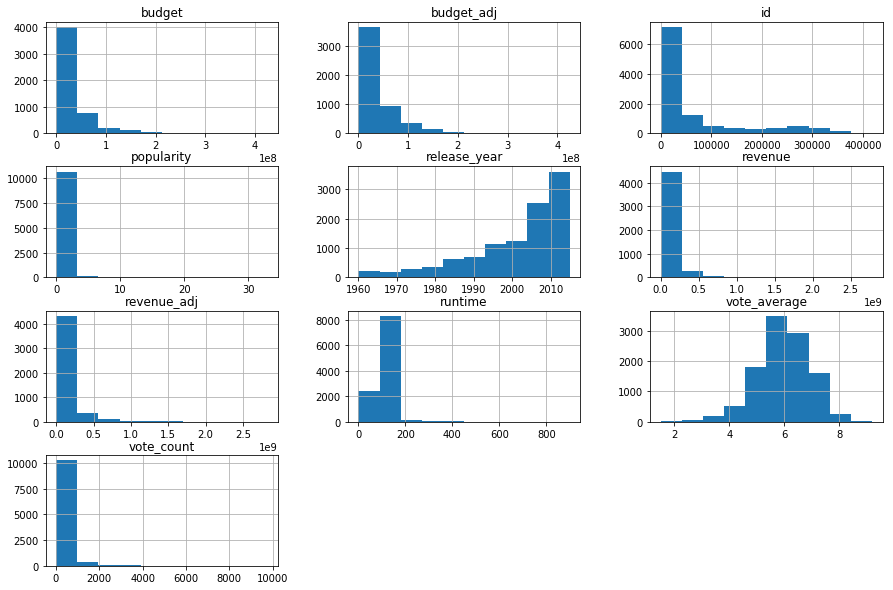

In [31]:
df.hist(figsize=(15,10));

## Cleaning Data

In [32]:
# Converting data type of release_date from Object to datetime
df['release_date']=pd.to_datetime(df['release_date'])
# Extracting month from release_date 
df['release_month']=df['release_date'].dt.month
# droping release _date column this is not very useful since we have already release_year and release_month column
df.drop(['release_date'],axis=1,inplace=True)
#confirming the changes
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939.3,1.392446e+09,6
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939.3,3.481613e+08,5


In [33]:
# Deleting redundant data which is not very useful for analysis
#  Revenue_adj & budget_adj account for inflation in 2010,So Let's keep only revenue_adj and budget_adj columns
df.drop(['imdb_id','homepage','tagline','vote_count','budget','revenue'],axis=1,inplace=True)

In [34]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
release_month              0
dtype: int64

In [35]:
# Filling Null Value with average in budget ,revenue 
# I deceided to fill the value with average not to drop the value since missing value is more than 40%,droping the value may affect analysis.
df['budget_adj'].fillna(df['budget_adj'].mean(),inplace=True)
df['revenue_adj'].fillna(df['revenue_adj'].mean(),inplace=True)
# Confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
release_month           10866 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.2+ MB


In [36]:
# Droping all the missing values
df.dropna(inplace=True)
# Confirming changes
df.isnull().sum()


id                      0
popularity              0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
release_month           0
dtype: int64

In [37]:
# Dropping Duplicates Valuee
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(8666, 15)

As we can see cast, genres, keywords, production_companies are separated by '|' character.
I have decided to separate genres using split function and create different dataframes using melt function .
Then accordingly merge it whenever required.

In [39]:
df_genres= df['genres'].str.split('|',expand=True)

In [40]:
df_genres['id']=df['id']

In [41]:
df_genres=pd.melt(df_genres,col_level=0,id_vars=['id'])

In [42]:
# Renaming value as genres
df_genres.rename(columns={'value':'genres'},inplace=True)
# Confirming the change
df_genres

,id,variable,genres
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action
5,281957,0,Western
6,87101,0,Science Fiction
7,286217,0,Drama
8,211672,0,Family
9,150540,0,Comedy


In [43]:
# As we can see there is nothing useful in variable column,so I will delete the column  
df_genres.drop(['variable'],axis=1,inplace=True)

In [44]:
# Droping all null values
df_genres.dropna(inplace=True)

In [45]:
# As we have created seperate dataframes of genres , i will delete it from df
df.drop(['genres'],axis=1,inplace=True)


# Exploratory Data Analysis


## Research Question 1 (Top highly rated movies and most popular movies, top directors contributing to highly rated movies??) 


In [46]:
df.sort_values(by='vote_average',ascending=False).loc[:,('original_title','director')][:3]

,original_title,director
6911,Pink Floyd: Pulse,David Mallet
8411,Queen - Rock Montreal,Saul Swimmer
3690,The Art of Flight,Curt Morgan


In [47]:
df.sort_values(by='popularity',ascending=False).loc[:,'original_title'][:3]

0          Jurassic World
1      Mad Max: Fury Road
629          Interstellar
Name: original_title, dtype: object

As we can see Pink Floyd,Queen,The art of flight are top highly rated movies and David Mallet,Saul Swimmer,Curt Morgan are 
top  directors  and  Jurassic World , Mad Max: Fury Road, Interstellar are  most popular movies.

## Research Question 2 (Which genres are most popular from year to year? )

In [48]:
#  Merging df and df_genres
movie_genres=pd.merge(df,df_genres,how='inner',on='id')
movie_genres.head(1)

,id,popularity,original_title,cast,director,keywords,overview,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,release_month,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09,6,Action


In [49]:
movie_genres2=movie_genres.groupby('release_year').genres.value_counts().reset_index(name='counts')


In [50]:
movie_genres2.set_index('genres',inplace= True)

In [51]:
movie_genres2.groupby('release_year')['counts'].idxmax()

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984    Comedy
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001     Drama
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: counts, dtype: object

 AS we can see  Drama  and Comedy are most popular genres year by year .


## Research Question 3  ( What kinds movie genres are made the most?)

In [52]:
movie_genres.genres.value_counts()

Drama              3934
Comedy             3050
Thriller           2462
Action             2022
Romance            1415
Horror             1339
Adventure          1271
Crime              1200
Science Fiction    1028
Family              946
Fantasy             763
Mystery             703
Animation           512
Music               309
History             287
Documentary         270
War                 235
Western             154
TV Movie            115
Foreign              90
Name: genres, dtype: int64

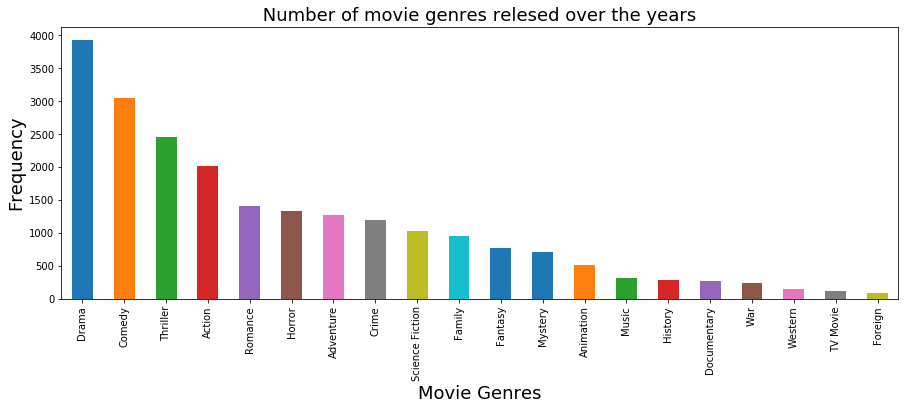

In [53]:
movie_genres.genres.value_counts().plot(kind='bar',figsize=(15,5))
plt.title(' Number of movie genres relesed over the years ',fontsize=18)
plt.xlabel('Movie Genres',fontsize=18)
plt.ylabel('Frequency',fontsize=18);

 As we can see Drama genres movie are made the most.

## Research Question 4  ( Number of movies relesed over the years?)

In [54]:
df.release_year.value_counts()

2014    520
2013    456
2015    440
2009    413
2012    387
2011    383
2008    380
2007    347
2010    343
2006    325
2005    299
2004    237
2002    219
2003    214
1999    198
2001    196
2000    184
1996    182
1998    181
1997    174
1993    165
1994    164
1995    159
1990    123
1992    120
1988    120
1989    118
1991    111
1987    104
1986    103
1985     96
1984     96
1982     78
1981     74
1983     74
1980     72
1978     59
1973     55
1979     54
1971     54
1977     54
1976     44
1966     44
1974     43
1964     41
1975     40
1970     38
1968     36
1972     36
1967     34
1963     33
1965     33
1962     30
1960     30
1961     28
1969     25
Name: release_year, dtype: int64

Text(0,0.5,'No of movies released')

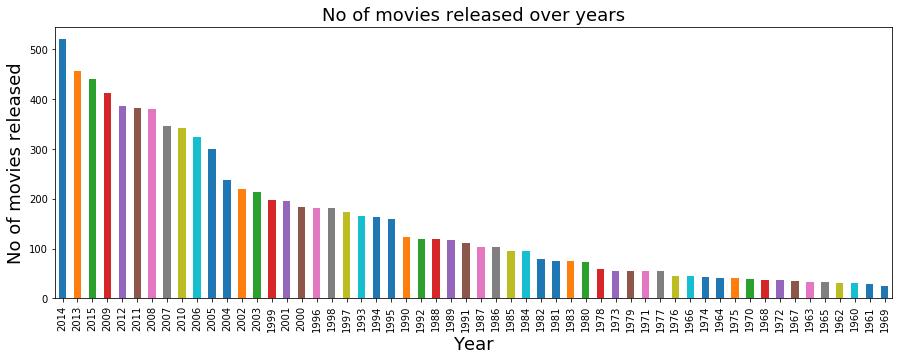

In [55]:
df.release_year.value_counts().plot(kind='bar',figsize=(15,5))
plt.title("No of movies released over years",fontsize=18)
plt.xlabel("Year",fontsize=18)
plt.ylabel("No of movies released",fontsize=18)

 As we can see number of movie relesed has been increased over the years.

## Research Question 5( What kinds of properties are associated with movies that have high revenues?)

In [56]:
# I will check if high revenue movies depend on high ratings,popularity,genres,budget

In [57]:
# Calculating gross profit 
df['gross_profit']=df['revenue_adj']-df['budget_adj']
df.head(2)

,id,popularity,original_title,cast,director,keywords,overview,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj,release_month,gross_profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09,6,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08,5,2.101614e+08


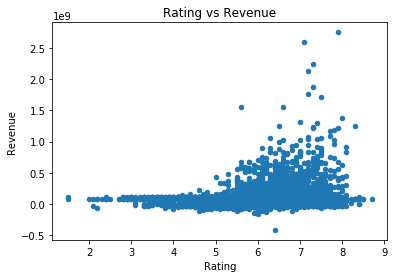

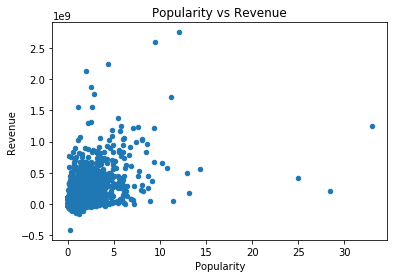

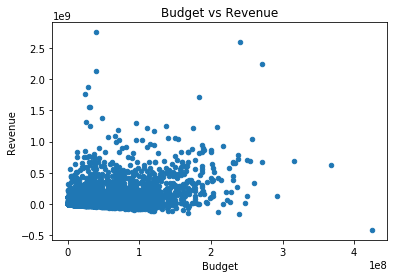

In [58]:
# Checking corelation between ratings and revenue,popularity and revenue,budget and revenue
def scatter_plot(data,title,xlabel,ylabel):
    data.plot(kind='scatter',x=data.columns[0],y=data.columns[1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
scatter_plot(df[['vote_average','gross_profit']],'Rating vs Revenue','Rating','Revenue')
scatter_plot(df[['popularity','gross_profit']],'Popularity vs Revenue','Popularity','Revenue')
scatter_plot(df[['budget_adj','gross_profit']],'Budget vs Revenue','Budget','Revenue');
    

In [59]:
# As we can see high revenue movie is not highly corelated with  high rating,popularity, budget.

In [60]:
# Merging df and df_genres in order to check  high revenue corelation with genres .
movie_genres=pd.merge(df,df_genres,how='inner',on='id')

In [61]:
# Checking the corelation between genres and high revenue
genres_rev=movie_genres.groupby('genres').sum()

In [62]:
genres_rev.sort_values(by='gross_profit',ascending=False).loc[:,'gross_profit'][0:5]

genres
Drama        2.652439e+11
Comedy       2.281821e+11
Action       2.077028e+11
Thriller     1.933696e+11
Adventure    1.808576e+11
Name: gross_profit, dtype: float64

In [63]:
# As we can see Drama,Comedy,Action are high profit earned genres.

## Reaserh Questions 6 (What is the all time highest  profit earned movie?)

In [64]:
df.sort_values(by='gross_profit',ascending=False).loc[:,'original_title'][:1]

1329    Star Wars
Name: original_title, dtype: object

In [65]:
# As we can see Stars Wars is all time highest profit earned movie.

### Reaserh Question 7 (What is the all time highest budget movie?)

In [66]:
df.sort_values(by='budget_adj',ascending=False).loc[:,'original_title'][:1]

2244    The Warrior's Way
Name: original_title, dtype: object

In [67]:
# The Warrior's Way is all time highest budget.

## Reaserh Question 8 (What month is considered "best" for releasing a films/shows?)

In [68]:
df.release_month.value_counts()

9     1061
10     910
12     812
8      735
6      696
5      664
1      655
3      653
11     652
7      649
4      625
2      554
Name: release_month, dtype: int64

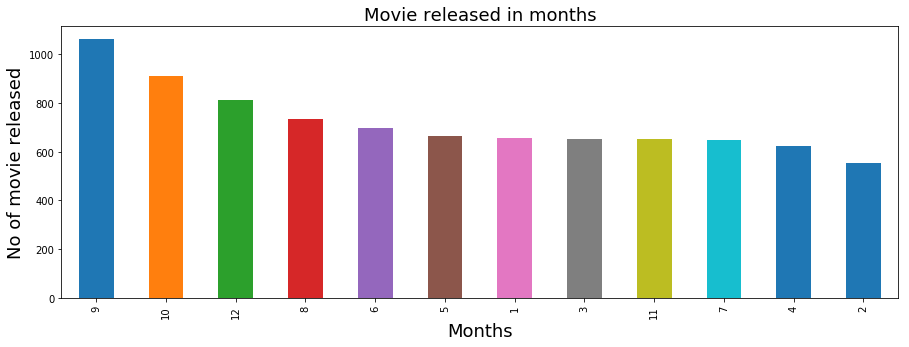

In [69]:
df.release_month.value_counts().plot(kind='bar',figsize=(15,5))
plt.title('Movie released in months',fontsize=18)
plt.xlabel('Months',fontsize=18)
plt.ylabel('No of movie released',fontsize=18);

As we can see September, Octobet and december are top months for releasing movie.

## Reaserh Questions(What is the relationship between ratings & runtime and  popularity & runtime  ?)


Text(0.5,1,'Ratings vs. Runtime')

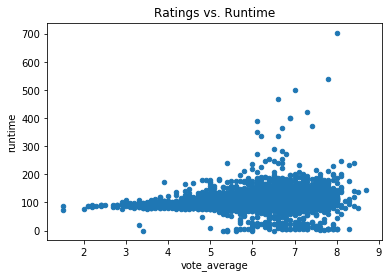

In [70]:
#  We will Plot  a scatter plot to see the relation between   ratings & runtime  and popularity & runtime 
df.plot(x='vote_average', y='runtime', kind='scatter')
plt.title('Ratings vs. Runtime')


In [71]:
# As we can see ratings and runtime are not highly related.

Text(0.5,1,'Popularity vs. Runtime')

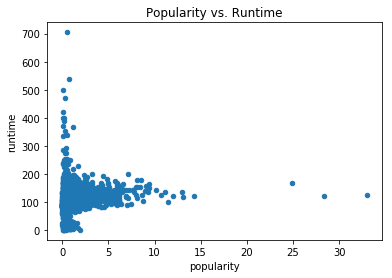

In [72]:
df.plot(x='popularity', y='runtime', kind='scatter')
plt.title('Popularity vs. Runtime')


#As we can see popularity and runtime are not highly related.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0